# Real-world Data Wrangling

Using real world data on wind turbines and wind capacity factors to estimate the wind energy generation in Germany. 

**Important note**: This notebook is based on the course 'data analyst' by udacity and uses a provided notebook and structure in order to do a project on data wrangling. 

In [318]:
import requests
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 1. Gather data


### **1.1.** Problem Statement


The goal of this project is to make an estimation of the annual generated electric energy provided by wind energy in total and for all 16 German states (Bundesländer). Besides that, we are interested in a hourly estimation of the wind energy generation. 

### **1.2.** Gather at least two datasets using two different data gathering methods


#### **Dataset 1**

In order to make a analyse the energy generation of wind turbines in Germany we need a dataset on capacity factors of wind turbines (based on the local or regional wind speed and technical assumptions on the installed fleet of wind turbines). The capacity factor denotes which fraction of the installed power of the wind turbines is used (float between 0 and 1). <br>

The first dataset consists of 2 subsets. The frist one is data on capacity factors of wind turbines in Germany for all German NUTS 2 regions. The data is available for 1980 to 2019.

Type: CSV File

Method: was downloaded via the API of https://www.renewables.ninja/ 

Dataset variables:

*   Variable 1: 'time' hourly time in UTC, starting in '1980-01-01 00:00:00' to '2019-12-31 23:00:00'
*   Variable 2-39: Capacity factors of the wind turbines for all German NUTS 2 regions
*   Variable 40: 'DE_TOTAL' Capacity factors of the wind turbines for Germany in Total 
 
Dataset info: # Renewables.ninja Wind (NUTS-2 hourly data, 1980-2019) - ninja_wind_country_DE_merra-2_nuts-2_corrected - Version: 1.3 - License: https://creativecommons.org/licenses/by-nc/4.0/ - Reference: https://doi.org/10.1016/j.energy.2019.08.060 


The second subset is data on capacity factors for wind turbines in Germany specifiing between onshore and offshore, because we need additional data on offshore wind turbines. 

Type: CSV File

Method: was downloaded via the API of https://www.renewables.ninja/ 

Dataset variables:

*   Variable 1: 'time' hourly time in UTC, starting in '1980-01-01 00:00:00' to '2019-12-31 23:00:00'
*   Variable 2: 'national'  Capacity factors of the wind turbines for Germany
*   Variable 3: 'offshore' Capacity factors of the offshore wind turbines for Germany 
*   Variable 4: 'onshore' Capacity factors of the onshore wind turbines for Germany 
 
Dataset info: # Renewables.ninja Wind (NUTS-2 hourly data, 1980-2019) - ninja_wind_country_DE_merra-2_nuts-2_corrected - Version: 1.3 - License: https://creativecommons.org/licenses/by-nc/4.0/ - Reference: https://doi.org/10.1016/j.energy.2019.08.060 


Renewables.ninja Wind (hourly data, split by on/offshore, 1980-2019) - ninja_wind_country_DE_current-merra-2_corrected - Version: 1.3 - License: https://creativecommons.org/licenses/by-nc/4.0/ - Reference: https://doi.org/10.1016/j.energy.2019.08.068,,,

In [319]:
# The API Import is based on the API documentation of 
# https://www.renewables.ninja/documentation/api

'''API Import can be skipped, downloaded dataset is included in input folder'''

# private token is obtainable via free registration at https://www.renewables.ninja/
token = pd.read_csv('token_renewable_ninjas.txt').iloc[0,0] 

api_base = 'https://www.renewables.ninja/'

s = requests.session()

# Send token header with each request
s.headers = {'Authorization': 'Token ' + token}

# wind energy data for Germany (DE) for all NUTS 2 regions
url = api_base + 'country_downloads/DE/ninja_wind_country_DE_current_merra-2_nuts-2_corrected.csv' 


        
# Get the response
r = s.get(url)

# Write response into csv 
file = open('input\wind_data_germany_NUTS2.csv', 'wb')
file.write(r.content)
file.close()

# wind energy data for Germany (DE) for additional offshore data
url =   api_base + 'country_downloads/DE/ninja_wind_country_DE_current-merra-2_corrected.csv' 

# Get the response
r = s.get(url)

# Write response into csv 
file = open('input\wind_data_germany_offshore.csv', 'wb')
file.write(r.content)
file.close()


In [320]:
# Read the saved csv as DataFrame
df1_1 = pd.read_csv('input\wind_data_germany_NUTS2.csv')
df1_2 = pd.read_csv('input\wind_data_germany_offshore.csv')

C:\Users\boeingh\AppData\Local\Temp\ipykernel_28504\1072727765.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df1_1 = pd.read_csv('input\wind_data_germany_NUTS2.csv')
C:\Users\boeingh\AppData\Local\Temp\ipykernel_28504\1072727765.py:3: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df1_2 = pd.read_csv('input\wind_data_germany_offshore.csv')


In [321]:
# Concat both DataFrames, without addionatl first column in DataFrame df1_2
df = pd.concat([df1_1, df1_2.iloc[:,1:4]], axis =1)
df

,"# Renewables.ninja Wind (NUTS-2 hourly data, 1980-2019) - ninja_wind_country_DE_merra-2_nuts-2_corrected - Version: 1.3 - License: https://creativecommons.org/licenses/by-nc/4.0/ - Reference: https://doi.org/10.1016/j.energy.2019.08.060",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,"# Units: time in UTC, other columns are capaci...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,time,DE11,DE12,DE13,DE14,DE21,DE22,DE23,DE24,DE25,...,DED2,DED4,DED5,DEE0,DEF0,DEG0,DE_TOTAL,national,offshore,onshore
2,1980-01-01 00:00:00,0.3095,0.2976,0.1413,0.396,0.4268,0.3764,0.3452,0.2439,0.3468,...,0.4048,0.3638,0.4305,0.3365,0.0175,0.3233,0.2561,0.2584,0.3169,0.2515
3,1980-01-01 01:00:00,0.2973,0.2679,0.108,0.3758,0.4875,0.39,0.3714,0.2719,0.4085,...,0.4302,0.3025,0.3668,0.3284,0.0236,0.3143,0.2547,0.2579,0.3242,0.2501
4,1980-01-01 02:00:00,0.3347,0.2664,0.1025,0.3826,0.5073,0.4446,0.4002,0.2992,0.4276,...,0.3462,0.2959,0.35,0.319,0.0315,0.3273,0.2426,0.2446,0.3307,0.2344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350637,2019-12-31 19:00:00,0.0736,0.1045,0.0907,0.0589,0.0262,0.0523,0.0299,0.0309,0.0358,...,0.2218,0.1214,0.1654,0.1408,0.1509,0.0697,0.1103,0.1071,0.0627,0.1123
350638,2019-12-31 20:00:00,0.0693,0.1127,0.0988,0.0905,0.0186,0.0181,0.012,0.0282,0.0187,...,0.1928,0.1109,0.1475,0.117,0.1263,0.0724,0.0921,0.0889,0.0493,0.0935
350639,2019-12-31 21:00:00,0.0605,0.1063,0.0706,0.0854,0.014,0.0084,0.004,0.0269,0.0128,...,0.1702,0.1006,0.1289,0.0973,0.1149,0.0669,0.0808,0.0774,0.0437,0.0813
350640,2019-12-31 22:00:00,0.057,0.1031,0.0647,0.0616,0.0089,0.0056,0.0016,0.0227,0.0112,...,0.143,0.0861,0.1099,0.0774,0.1162,0.0553,0.0722,0.068,0.0495,0.0701


#### Dataset 2

In addition to the capacity factors of the wind turbines we need a dataset on the installed capacity of wind turbines in Germany. In order to analyse the different German states, the dataset must contain data on the location of the wind turbine. <br>
The downloaded dataset consists of data on the installed wind turbines in Germany from the public register for all electricity producing entities in public electricity networks. Downloaded 1. Sep 2023. <br>

Type:  CSV File

Method: Obtained via direct download from webpage of German electricity market regulator https://www.marktstammdatenregister.de/MaStR/Einheit/Einheiten/OeffentlicheEinheitenuebersicht  <br />

Dataset variables: The Dataset contains 50 different columns/variables. Hence, all non necessary variables are going to be removed. <br />

Important variables:
*   column 8: Bundesland - German state where the wind turbine is located
*   column 44: Installierte Leistung - installed capacity

In [322]:
#FILL IN 2nd data gathering and loading method

df2_1 = pd.read_csv('input\Stromerzeuger_1_bis_25000.csv', sep=';', on_bad_lines='warn') 
df2_2 = pd.read_csv('input\Stromerzeuger_25001_bis_34883.csv', sep=';', on_bad_lines='warn') 

df2 = pd.concat([df2_1, df2_2], ignore_index=True)


In [323]:
df2.head(5)

,MaStR-Nr. der Einheit,Anzeige-Name der Einheit,Betriebs-Status,Energieträger,Bruttoleistung der Einheit,Nettonennleistung der Einheit,Inbetriebnahmedatum der Einheit,Registrierungsdatum der Einheit,Bundesland,Postleitzahl,...,MaStR-Nr. der Lokation,MaStR-Nr. der EEG-Anlage,EEG-Anlagenschlüssel,Inbetriebnahmedatum der EEG-Anlage,Installierte Leistung,Zuschlagnummer (EEG/KWK-Ausschreibung),MaStR-Nr. der KWK-Anlage,Inbetriebnahmedatum der KWK-Anlage,Elektrische KWK-Leistung,Thermische Nutzleistung in kW
0,SEE940146675093,WEA 5,In Betrieb,Wind,3000,3000,1.9.2017,13.2.2019,Hessen,34298.0,...,SEL911577226093,EEG951718125489,E23572010000000001000024015700005,1.9.2017,3000,NaN,NaN,NaN,NaN,NaN
1,SEE973767078653,WEA 2 / 1150775,In Betrieb,Wind,3000,3000,28.9.2017,1.2.2019,Schleswig-Holstein,23824.0,...,SEL950515942794,EEG912885854947,E2079301EA01000000000087410800002,28.9.2017,3000,NaN,NaN,NaN,NaN,NaN
2,SEE914108319653,WEA 4,In Betrieb,Wind,3000,3000,4.9.2017,13.2.2019,Hessen,34298.0,...,SEL911577226093,EEG996216581153,E23572010000000001000024015700006,4.9.2017,3000,NaN,NaN,NaN,NaN,NaN
3,SEE982417853618,WEA 6,In Betrieb,Wind,3000,3000,31.8.2017,13.2.2019,Hessen,34298.0,...,SEL911577226093,EEG926639129328,E23572010000000001000024015700004,31.8.2017,3000,NaN,NaN,NaN,NaN,NaN
4,SEE913741454097,WEA 1 BMR,In Betrieb,Wind,2400,2400,11.1.2017,31.1.2019,Nordrhein-Westfalen,52525.0,...,SEL928898629335,EEG982767300077,E3070101Wn00000000000002891900001,19.1.2017,2400,NaN,NaN,NaN,NaN,NaN


## 2. Assess data


Assessing the data visually and programmatically according to data quality and tidiness metrics. 

The key dimensions of data quality: 

1. Completeness is a metric that helps you understand whether your data is sufficient to answer interesting questions or solve your problem.
2. Validity is a metric helping you understand how well your data conforms to a defined set of rules for data, also known as a schema.
3. Accuracy is a metric that helps you understand whether your data accurately represents the reality it aims to depict.
4. Consistency is a metric that helps you understand two things: whether your data follows a standard format and whether your data’s info matches with information from other data sources.
5. Uniqueness is a metric that helps you understand whether there are duplicate or overlapping values in your data.

### Tidiness Issue 1: columns and index not correctly set in first dataset

In [324]:
# Inspecting the dataframe visually
df.head(5)

,"# Renewables.ninja Wind (NUTS-2 hourly data, 1980-2019) - ninja_wind_country_DE_merra-2_nuts-2_corrected - Version: 1.3 - License: https://creativecommons.org/licenses/by-nc/4.0/ - Reference: https://doi.org/10.1016/j.energy.2019.08.060",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,"# Units: time in UTC, other columns are capaci...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,time,DE11,DE12,DE13,DE14,DE21,DE22,DE23,DE24,DE25,...,DED2,DED4,DED5,DEE0,DEF0,DEG0,DE_TOTAL,national,offshore,onshore
2,1980-01-01 00:00:00,0.3095,0.2976,0.1413,0.396,0.4268,0.3764,0.3452,0.2439,0.3468,...,0.4048,0.3638,0.4305,0.3365,0.0175,0.3233,0.2561,0.2584,0.3169,0.2515
3,1980-01-01 01:00:00,0.2973,0.2679,0.108,0.3758,0.4875,0.39,0.3714,0.2719,0.4085,...,0.4302,0.3025,0.3668,0.3284,0.0236,0.3143,0.2547,0.2579,0.3242,0.2501
4,1980-01-01 02:00:00,0.3347,0.2664,0.1025,0.3826,0.5073,0.4446,0.4002,0.2992,0.4276,...,0.3462,0.2959,0.35,0.319,0.0315,0.3273,0.2426,0.2446,0.3307,0.2344


In [325]:
# Inspecting the dataframe programmatically
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350642 entries, 0 to 350641
Data columns (total 43 columns):
 #   Column                                                                                                                                                                                                                                        Non-Null Count   Dtype 
---  ------                                                                                                                                                                                                                                        --------------   ----- 
 0   # Renewables.ninja Wind (NUTS-2 hourly data, 1980-2019) - ninja_wind_country_DE_merra-2_nuts-2_corrected - Version: 1.3 - License: https://creativecommons.org/licenses/by-nc/4.0/ - Reference: https://doi.org/10.1016/j.energy.2019.08.060  350642 non-null  object
 1   Unnamed: 1                                                                         

**Issue**: columns and time index are not set correctly

### Tidiness Issue 2: Wrond data types in dataset 1

In [326]:
# Inspecting the dataframe visually
df.sample()

,"# Renewables.ninja Wind (NUTS-2 hourly data, 1980-2019) - ninja_wind_country_DE_merra-2_nuts-2_corrected - Version: 1.3 - License: https://creativecommons.org/licenses/by-nc/4.0/ - Reference: https://doi.org/10.1016/j.energy.2019.08.060",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 1,Unnamed: 2,Unnamed: 3
160208,1998-04-11 06:00:00,0.1853,0.2051,0.0923,0.0977,0.1637,0.2412,0.36,0.5221,0.2958,...,0.4441,0.531,0.5675,0.3405,0.1397,0.3788,0.2008,0.1947,0.1621,0.1985


In [327]:
# Inspecting the dataframe programmatically
df.dtypes.describe()

count         43
unique         1
top       object
freq          43
dtype: object

**Issue**: the data on capacity factors is in wrong data type (str instead of float)

### Tidiness Issue 3: Column 'Installierte Leistung' in second dataset is in wrong datatype and contains German Decimal separator "," 


In [328]:
# Inspecting the dataframe visually
df2.loc[df2['Installierte Leistung'].notna()].query('`Installierte Leistung`.str.contains(",")')

,MaStR-Nr. der Einheit,Anzeige-Name der Einheit,Betriebs-Status,Energieträger,Bruttoleistung der Einheit,Nettonennleistung der Einheit,Inbetriebnahmedatum der Einheit,Registrierungsdatum der Einheit,Bundesland,Postleitzahl,...,MaStR-Nr. der Lokation,MaStR-Nr. der EEG-Anlage,EEG-Anlagenschlüssel,Inbetriebnahmedatum der EEG-Anlage,Installierte Leistung,Zuschlagnummer (EEG/KWK-Ausschreibung),MaStR-Nr. der KWK-Anlage,Inbetriebnahmedatum der KWK-Anlage,Elektrische KWK-Leistung,Thermische Nutzleistung in kW
79,SEE909849088661,KWEA,In Betrieb,Wind,"29,8","29,8",22.5.2018,12.2.2019,Niedersachsen,26169.0,...,SEL935786229775,EEG939249793872,E21846010000000000001132583200001,22.5.2018,"29,8",NaN,NaN,NaN,NaN,NaN
246,SEE902072542702,Windmast,In Betrieb,Wind,"3,68","3,68",23.4.2013,6.2.2019,Hessen,34516.0,...,SEL970024742067,EEG982857338805,E2052301111AA00000000011551700001,23.4.2013,"3,68",NaN,NaN,NaN,NaN,NaN
280,SEE907566446207,"Antaris 5,5 KW",In Betrieb,Wind,"5,5","5,5",15.2.2012,7.2.2019,Bayern,85435.0,...,SEL951172808560,EEG923276605154,E21422010020024104100101010000001,15.2.2012,"5,5",NaN,NaN,NaN,NaN,NaN
503,SEE902262723539,Windrad,In Betrieb,Wind,"9,9","9,9",8.3.2014,11.2.2019,Baden-Württemberg,72469.0,...,SEL918501316738,EEG993680145010,NaN,8.3.2014,"9,9",NaN,NaN,NaN,NaN,NaN
949,SEE988744484358,"MK Windkraftanlage 1,6KW",In Betrieb,Wind,"1,6","1,6",8.5.2013,18.2.2019,Bayern,95131.0,...,SEL916348033429,EEG961175576465,NaN,8.5.2013,"1,6",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34478,SEE970611368106,Mini-Windkraftanlage Hausdach,In Betrieb,Wind,"0,6","0,6",1.6.2023,8.6.2023,Niedersachsen,29690.0,...,SEL914366504679,EEG951691968219,NaN,1.6.2023,"0,6",NaN,NaN,NaN,NaN,NaN
34554,SEE949642137555,Hof-Schürholz Mikrowindanlage,In Betrieb,Wind,"0,9","0,9",2.7.2023,2.7.2023,Nordrhein-Westfalen,57482.0,...,SEL926550841293,EEG935314921782,NaN,2.7.2023,"0,9",NaN,NaN,NaN,NaN,NaN
34661,SEE916749066187,"Windbaum 10,8 KW/peak",In Betrieb,Wind,"10,8","10,8",29.6.2023,30.6.2023,Rheinland-Pfalz,55270.0,...,SEL964314156276,EEG915333192769,NaN,29.6.2023,"10,8",NaN,NaN,NaN,NaN,NaN
34793,SEE974699041647,E105681,In Betrieb,Wind,"7,5","7,5",20.7.2023,31.7.2023,Mecklenburg-Vorpommern,18225.0,...,SEL998220497185,EEG984300312905,NaN,20.7.2023,"7,5",NaN,NaN,NaN,NaN,NaN


In [329]:
# Inspecting the dataframe programmatically
df2['Installierte Leistung'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 34883 entries, 0 to 34882
Series name: Installierte Leistung
Non-Null Count  Dtype 
--------------  ----- 
32231 non-null  object
dtypes: object(1)
memory usage: 272.6+ KB


**Issue**: Missing values in columns 'Bundesland' (German State) and 'Installierte Leistung' (installed capacity)

### Quality Issue 1: Data is not consistent for merging the two Dataframes

In [330]:
# Inspecting the dataframe visually
df.head(5)

,"# Renewables.ninja Wind (NUTS-2 hourly data, 1980-2019) - ninja_wind_country_DE_merra-2_nuts-2_corrected - Version: 1.3 - License: https://creativecommons.org/licenses/by-nc/4.0/ - Reference: https://doi.org/10.1016/j.energy.2019.08.060",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,"# Units: time in UTC, other columns are capaci...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,time,DE11,DE12,DE13,DE14,DE21,DE22,DE23,DE24,DE25,...,DED2,DED4,DED5,DEE0,DEF0,DEG0,DE_TOTAL,national,offshore,onshore
2,1980-01-01 00:00:00,0.3095,0.2976,0.1413,0.396,0.4268,0.3764,0.3452,0.2439,0.3468,...,0.4048,0.3638,0.4305,0.3365,0.0175,0.3233,0.2561,0.2584,0.3169,0.2515
3,1980-01-01 01:00:00,0.2973,0.2679,0.108,0.3758,0.4875,0.39,0.3714,0.2719,0.4085,...,0.4302,0.3025,0.3668,0.3284,0.0236,0.3143,0.2547,0.2579,0.3242,0.2501
4,1980-01-01 02:00:00,0.3347,0.2664,0.1025,0.3826,0.5073,0.4446,0.4002,0.2992,0.4276,...,0.3462,0.2959,0.35,0.319,0.0315,0.3273,0.2426,0.2446,0.3307,0.2344


In [331]:
# Inspecting the dataframe programmatically
df.loc[1]

# Renewables.ninja Wind (NUTS-2 hourly data, 1980-2019) - ninja_wind_country_DE_merra-2_nuts-2_corrected - Version: 1.3 - License: https://creativecommons.org/licenses/by-nc/4.0/ - Reference: https://doi.org/10.1016/j.energy.2019.08.060        time
Unnamed: 1                                                                                                                                                                                                                                          DE11
Unnamed: 2                                                                                                                                                                                                                                          DE12
Unnamed: 3                                                                                                                                                                                                                                          DE13
Unna

**Issue**: The analysis focuses on the German states (NUTS 1 regions), but the data in the first dataset is given in NUTS 2 regions. Hence, we have to combine the data for the NUTS 2 regions into data for NUTS 1 regions (German States). 

### Quality Issue 2: Missing values in second Dataset

Checking for missing values in column 'Bundesland' (German state)

In [332]:
# Inspecting the dataframe visually
df2.query('Bundesland.isna()')

,MaStR-Nr. der Einheit,Anzeige-Name der Einheit,Betriebs-Status,Energieträger,Bruttoleistung der Einheit,Nettonennleistung der Einheit,Inbetriebnahmedatum der Einheit,Registrierungsdatum der Einheit,Bundesland,Postleitzahl,...,MaStR-Nr. der Lokation,MaStR-Nr. der EEG-Anlage,EEG-Anlagenschlüssel,Inbetriebnahmedatum der EEG-Anlage,Installierte Leistung,Zuschlagnummer (EEG/KWK-Ausschreibung),MaStR-Nr. der KWK-Anlage,Inbetriebnahmedatum der KWK-Anlage,Elektrische KWK-Leistung,Thermische Nutzleistung in kW
28289,SEE945735773402,V214103 (WH26),In Betrieb,Wind,3300,3300,23.12.2016,16.12.2020,NaN,NaN,...,SEL942043454245,EEG999280094369,E4183201RS50343407000093516100001,23.12.2016,3300,NaN,NaN,NaN,NaN,NaN


In [333]:
#  Inspecting the dataframe programmatically
df2['Bundesland'].isna().sum()

1

Checking for missing values in column 'Installierte Leistung' (installed capacity)

In [334]:
# Inspecting the dataframe programmatically
df2['Installierte Leistung'].isna().sum()

2652

In [335]:
# Inspecting the dataframe visually
df2.loc[df2['Installierte Leistung'].isna()]

,MaStR-Nr. der Einheit,Anzeige-Name der Einheit,Betriebs-Status,Energieträger,Bruttoleistung der Einheit,Nettonennleistung der Einheit,Inbetriebnahmedatum der Einheit,Registrierungsdatum der Einheit,Bundesland,Postleitzahl,...,MaStR-Nr. der Lokation,MaStR-Nr. der EEG-Anlage,EEG-Anlagenschlüssel,Inbetriebnahmedatum der EEG-Anlage,Installierte Leistung,Zuschlagnummer (EEG/KWK-Ausschreibung),MaStR-Nr. der KWK-Anlage,Inbetriebnahmedatum der KWK-Anlage,Elektrische KWK-Leistung,Thermische Nutzleistung in kW
12,SEE923802377883,WEA 2,In Planung,Wind,5700,5700,NaN,1.2.2019,Baden-Württemberg,78183.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,SEE950179793688,WEA 3,In Planung,Wind,5700,5700,NaN,1.2.2019,Baden-Württemberg,78183.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,SEE926034105682,WEA 4,In Planung,Wind,5700,5700,NaN,1.2.2019,Baden-Württemberg,78183.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,SEE971087087461,WEA 6,In Planung,Wind,5700,5700,NaN,1.2.2019,Baden-Württemberg,78183.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,SEE910634021237,WEA 7,In Planung,Wind,5700,5700,NaN,1.2.2019,Baden-Württemberg,78166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34877,SEE998676853559,GR18,In Planung,Wind,6000,6000,NaN,30.8.2023,Thüringen,99718.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34878,SEE962120339821,GR19,In Planung,Wind,6000,6000,NaN,30.8.2023,Thüringen,99718.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34879,SEE997949171680,GR20,In Planung,Wind,6000,6000,NaN,30.8.2023,Thüringen,99718.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34880,SEE950186659038,GR21,In Planung,Wind,6000,6000,NaN,30.8.2023,Thüringen,99718.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Issue**: Missing values in columns 'Bundesland' (German State) and 'Installierte Leistung' (installed capacity)

## 3. Clean data
In this section the data is cleaned and the stated issues are resolved. 

In [336]:
# Make copies of the datasets to ensure the raw dataframes are not impacted
df1_clean = df.copy()
df2_clean = df2.copy()

### **Clean Tidiness Issue 1: Setting the right Columns and index**

In [337]:
# Set correct columns
columns = df1_clean.iloc[1].values # Rename the columns with data in correct row
df1_clean.drop([0,1], inplace=True) # Dropping first two rows with non valid data
df1_clean.columns = columns # renaming the columns

In [338]:
# Set correct index
df1_clean['time'] = pd.DatetimeIndex(df1_clean['time']) # Cast column 'time' as DatetimeIndex
df1_clean.set_index('time', inplace=True) # Set as time Index for Dataframe

In [339]:
# Validate the cleaning was successful: time index is set and column names are correct
df1_clean.head(5)

,DE11,DE12,DE13,DE14,DE21,DE22,DE23,DE24,DE25,DE26,...,DED2,DED4,DED5,DEE0,DEF0,DEG0,DE_TOTAL,national,offshore,onshore
time,,,,,,,,,,,,,,,,,,,,,
1980-01-01 00:00:00,0.3095,0.2976,0.1413,0.396,0.4268,0.3764,0.3452,0.2439,0.3468,0.3309,...,0.4048,0.3638,0.4305,0.3365,0.0175,0.3233,0.2561,0.2584,0.3169,0.2515
1980-01-01 01:00:00,0.2973,0.2679,0.108,0.3758,0.4875,0.39,0.3714,0.2719,0.4085,0.3692,...,0.4302,0.3025,0.3668,0.3284,0.0236,0.3143,0.2547,0.2579,0.3242,0.2501
1980-01-01 02:00:00,0.3347,0.2664,0.1025,0.3826,0.5073,0.4446,0.4002,0.2992,0.4276,0.38,...,0.3462,0.2959,0.35,0.319,0.0315,0.3273,0.2426,0.2446,0.3307,0.2344
1980-01-01 03:00:00,0.344,0.2764,0.0995,0.3909,0.5074,0.4321,0.4107,0.3193,0.4299,0.3302,...,0.352,0.2938,0.3512,0.289,0.0446,0.3553,0.2351,0.2362,0.3488,0.223
1980-01-01 04:00:00,0.3153,0.2619,0.0942,0.39,0.4734,0.3904,0.4257,0.3424,0.4137,0.3166,...,0.4035,0.2929,0.3642,0.2768,0.0735,0.3689,0.2339,0.2346,0.3779,0.2178


### **Clean Tidiness Issue 2: Setting the correct data type**

In [340]:
# Set correct data type
df1_clean = df1_clean.astype(float) # cast whole DataFrame as Float

In [341]:
# Asser that all dtype are 'float64'
for dtype in df1_clean.dtypes: 
    assert dtype == 'float64'

In [342]:
# Check dtypes
df1_clean.dtypes

DE11        float64
DE12        float64
DE13        float64
DE14        float64
DE21        float64
DE22        float64
DE23        float64
DE24        float64
DE25        float64
DE26        float64
DE27        float64
DE30        float64
DE40        float64
DE50        float64
DE60        float64
DE71        float64
DE72        float64
DE73        float64
DE80        float64
DE91        float64
DE92        float64
DE93        float64
DE94        float64
DEA1        float64
DEA2        float64
DEA3        float64
DEA4        float64
DEA5        float64
DEB1        float64
DEB2        float64
DEB3        float64
DEC0        float64
DED2        float64
DED4        float64
DED5        float64
DEE0        float64
DEF0        float64
DEG0        float64
DE_TOTAL    float64
national    float64
offshore    float64
onshore     float64
dtype: object

### **Clean Quality Issue 1: Data Consistency - Data is not consistent for merging the two Dataframes**

In [343]:
# Define colums to replace original columns without last character to merge data from NUTS2 to NUTS1
to_replace = df1_clean.columns[0:38].astype(str).to_series().apply(lambda x: str(x)[:-1])
df1_clean.reset_index(inplace=True)

In [344]:
# Replace colum names, regroup data and 
df1_clean = df1_clean.rename(columns=to_replace).melt(id_vars = 'time').groupby(by=['time', 'variable'])['value'].mean().reset_index(level=1).pivot(columns='variable')
df1_clean.columns = df1_clean.columns.droplevel(0)

In [345]:
# Check visually that all column names are set correctly to NUTS1 region names
df1_clean.head(5)

variable,DE1,DE2,DE3,DE4,DE5,DE6,DE7,DE8,DE9,DEA,DEB,DEC,DED,DEE,DEF,DEG,DE_TOTAL,national,offshore,onshore
time,,,,,,,,,,,,,,,,,,,,
1980-01-01 00:00:00,0.28610,0.356800,0.0602,0.1433,0.2663,0.0423,0.228500,0.1352,0.319825,0.32572,0.255900,0.1693,0.399700,0.3365,0.0175,0.3233,0.2561,0.2584,0.3169,0.2515
1980-01-01 01:00:00,0.26225,0.390686,0.0967,0.1697,0.2344,0.0354,0.230433,0.1199,0.321325,0.31828,0.223600,0.1610,0.366500,0.3284,0.0236,0.3143,0.2547,0.2579,0.3242,0.2501
1980-01-01 02:00:00,0.27155,0.409300,0.0894,0.1382,0.1865,0.0144,0.223933,0.1066,0.285350,0.33764,0.210833,0.1721,0.330700,0.3190,0.0315,0.3273,0.2426,0.2446,0.3307,0.2344
1980-01-01 03:00:00,0.27770,0.408400,0.0646,0.1264,0.1903,0.0070,0.275767,0.0976,0.261475,0.33322,0.195633,0.1424,0.332333,0.2890,0.0446,0.3553,0.2351,0.2362,0.3488,0.2230
1980-01-01 04:00:00,0.26535,0.397943,0.0582,0.1358,0.1940,0.0030,0.284567,0.0927,0.250500,0.30742,0.198733,0.1471,0.353533,0.2768,0.0735,0.3689,0.2339,0.2346,0.3779,0.2178


In [346]:
# Replace all NUTS1 region names with German state names for merging data
NUTS1_to_states = pd.read_excel('input\\NUTS_regions_germany.xlsx')
NUTS1_to_states.set_index('NUTS1', inplace=True)
NUTS1_to_states_dict = NUTS1_to_states.to_dict()['State']
df1_clean.rename(columns=NUTS1_to_states_dict, inplace=True)

In [347]:
# Check visually that the NUTS1 regions names are replaced with state names
df1_clean.head(20)

variable,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen,DE_TOTAL,national,offshore,onshore
time,,,,,,,,,,,,,,,,,,,,
1980-01-01 00:00:00,0.286100,0.356800,0.0602,0.1433,0.2663,0.0423,0.228500,0.1352,0.319825,0.32572,0.255900,0.1693,0.399700,0.3365,0.0175,0.3233,0.2561,0.2584,0.3169,0.2515
1980-01-01 01:00:00,0.262250,0.390686,0.0967,0.1697,0.2344,0.0354,0.230433,0.1199,0.321325,0.31828,0.223600,0.1610,0.366500,0.3284,0.0236,0.3143,0.2547,0.2579,0.3242,0.2501
1980-01-01 02:00:00,0.271550,0.409300,0.0894,0.1382,0.1865,0.0144,0.223933,0.1066,0.285350,0.33764,0.210833,0.1721,0.330700,0.3190,0.0315,0.3273,0.2426,0.2446,0.3307,0.2344
1980-01-01 03:00:00,0.277700,0.408400,0.0646,0.1264,0.1903,0.0070,0.275767,0.0976,0.261475,0.33322,0.195633,0.1424,0.332333,0.2890,0.0446,0.3553,0.2351,0.2362,0.3488,0.2230
1980-01-01 04:00:00,0.265350,0.397943,0.0582,0.1358,0.1940,0.0030,0.284567,0.0927,0.250500,0.30742,0.198733,0.1471,0.353533,0.2768,0.0735,0.3689,0.2339,0.2346,0.3779,0.2178
1980-01-01 05:00:00,0.260550,0.407714,0.0613,0.1295,0.1594,0.0008,0.301600,0.0920,0.236650,0.29086,0.198000,0.1335,0.339300,0.2796,0.1164,0.4045,0.2338,0.2323,0.3931,0.2134
1980-01-01 06:00:00,0.230225,0.401371,0.0598,0.1404,0.1211,0.0000,0.315033,0.0929,0.228200,0.30012,0.197867,0.1260,0.319067,0.2429,0.1519,0.4289,0.2304,0.2275,0.3894,0.2085
1980-01-01 07:00:00,0.194375,0.397543,0.0402,0.1025,0.1072,0.0000,0.270467,0.0961,0.210325,0.25564,0.188000,0.1324,0.279167,0.2270,0.1694,0.4111,0.2126,0.2090,0.3807,0.1889
1980-01-01 08:00:00,0.178800,0.414786,0.0215,0.0741,0.0980,0.0002,0.216067,0.1011,0.187800,0.22898,0.176467,0.1288,0.248333,0.2130,0.1691,0.3581,0.1944,0.1898,0.3582,0.1701


Renaming columns in second DataFrame for Data Consinstency and merging.

In [348]:
df2_clean.rename(columns={'Bundesland':'state', 'Installierte Leistung':'installed_capacity'}, inplace=True)

In [349]:
# Check visually for correct renamed columns
df2_clean.head()

,MaStR-Nr. der Einheit,Anzeige-Name der Einheit,Betriebs-Status,Energieträger,Bruttoleistung der Einheit,Nettonennleistung der Einheit,Inbetriebnahmedatum der Einheit,Registrierungsdatum der Einheit,state,Postleitzahl,...,MaStR-Nr. der Lokation,MaStR-Nr. der EEG-Anlage,EEG-Anlagenschlüssel,Inbetriebnahmedatum der EEG-Anlage,installed_capacity,Zuschlagnummer (EEG/KWK-Ausschreibung),MaStR-Nr. der KWK-Anlage,Inbetriebnahmedatum der KWK-Anlage,Elektrische KWK-Leistung,Thermische Nutzleistung in kW
0,SEE940146675093,WEA 5,In Betrieb,Wind,3000,3000,1.9.2017,13.2.2019,Hessen,34298.0,...,SEL911577226093,EEG951718125489,E23572010000000001000024015700005,1.9.2017,3000,NaN,NaN,NaN,NaN,NaN
1,SEE973767078653,WEA 2 / 1150775,In Betrieb,Wind,3000,3000,28.9.2017,1.2.2019,Schleswig-Holstein,23824.0,...,SEL950515942794,EEG912885854947,E2079301EA01000000000087410800002,28.9.2017,3000,NaN,NaN,NaN,NaN,NaN
2,SEE914108319653,WEA 4,In Betrieb,Wind,3000,3000,4.9.2017,13.2.2019,Hessen,34298.0,...,SEL911577226093,EEG996216581153,E23572010000000001000024015700006,4.9.2017,3000,NaN,NaN,NaN,NaN,NaN
3,SEE982417853618,WEA 6,In Betrieb,Wind,3000,3000,31.8.2017,13.2.2019,Hessen,34298.0,...,SEL911577226093,EEG926639129328,E23572010000000001000024015700004,31.8.2017,3000,NaN,NaN,NaN,NaN,NaN
4,SEE913741454097,WEA 1 BMR,In Betrieb,Wind,2400,2400,11.1.2017,31.1.2019,Nordrhein-Westfalen,52525.0,...,SEL928898629335,EEG982767300077,E3070101Wn00000000000002891900001,19.1.2017,2400,NaN,NaN,NaN,NaN,NaN


In [350]:
# Replace all data with "Ausschließliche Wirtschaftszone" (Exclusive Economic Zone, 12 to 200 nautical miles offshore) to offshore
df2_clean['state'] = df2_clean['state'].replace(to_replace={'Ausschließliche Wirtschaftszone': 'offshore'})

In [351]:
# Check programmatically that all states are named correctly 
df2_clean['state'].unique()

array(['Hessen', 'Schleswig-Holstein', 'Nordrhein-Westfalen',
       'Rheinland-Pfalz', 'Bayern', 'Baden-Württemberg',
       'Mecklenburg-Vorpommern', 'Niedersachsen', 'Sachsen-Anhalt',
       'Bremen', 'Brandenburg', 'Sachsen', 'Saarland', 'offshore',
       'Thüringen', 'Hamburg', 'Berlin', nan], dtype=object)

### **Clean Quality Issue 2: Missing values in second Dataset**

In [352]:
# Drop data with missing info an "Bundesland" (German state)
idx_drop = df2_clean.query('state.isna()').index
len(idx_drop)

1

In [353]:
print(df2_clean.shape[0])
df2_clean.drop(index=idx_drop, inplace=True)
print(df2_clean.shape[0])

34883
34882


In [354]:
# Programmatically that there is no NaN data on state
assert df2_clean.query('state.isna()').shape[0] == 0, 'Still missing data for "state"'

In [355]:
# Get the index of all data rows where 'installed capacity' is NaN
idx_replace = df2_clean[df2_clean['installed_capacity'].isna()].index

In [356]:
# Replace all NaN data with data on gross installed capacity
df2_clean.loc[idx_replace, 'installed_capacity'] = df2_clean.loc[idx_replace, 'Bruttoleistung der Einheit']

In [357]:
# Programmatically assert that there is no NaN data on installed capacity
assert df2_clean[df2_clean['installed_capacity'].isna()].shape[0] == 0, 'Still missing data for "Installierte Leistung"'

### **Clean Tidiness Issue 3: Column 'Installierte Leistung' in second dataset is in wrong datatype and contains German Decimal separator ","**

In [358]:
# Replace all decimal separators with "," and cast installed capacity as float
df2_clean['installed_capacity'] = df2_clean['installed_capacity'].str.replace(pat=',', repl='.').astype(float)

In [359]:
# Programmatically assert that dtype is set correctly for installed capacity
assert df2_clean['installed_capacity'].dtype == 'float64', 'dtype of "installed_capacity" still wrong'

### **Remove unnecessary variables and combine datasets**



In the step, the unnecessary variables are removed and the datasets are combined. 

In [360]:
# Removing unnecessary variables in second DataFrame with a groupby and copying to new DataFrame
df_inst_cap = df2_clean[['state','installed_capacity']].groupby(by='state').sum() 

# Change installed capacity from kW to GW 
df_inst_cap = df_inst_cap / 1000000 
df_inst_cap.rename(columns={'installed_capacity':'installed_capacity_GW'}, inplace=True)

In [361]:
df_inst_cap

,installed_capacity_GW
state,
Baden-Württemberg,2.491149
Bayern,2.734406
Berlin,0.016575
Brandenburg,9.796913
Bremen,0.198414
Hamburg,0.122500
Hessen,2.902203
Mecklenburg-Vorpommern,4.512994
Niedersachsen,14.865622


The visual inspection indicates that the second DataFrame was succesfully grouped and recalculated. 

In [362]:
# Seeting up final DataFrame and filling final df with combinded data of both datasets
df_wind_energy = pd.DataFrame()
for state in df_inst_cap.index:
    df_wind_energy[state] = df1_clean[state] * df_inst_cap.loc[state, 'installed_capacity_GW']
    

In [363]:
# Visually check that the final DataFrame is correct
df_wind_energy

,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen,offshore
time,,,,,,,,,,,,,,,,,
1980-01-01 00:00:00,0.712718,0.975636,0.000998,1.403898,0.052838,0.005182,0.663153,0.610157,4.754398,3.159287,1.155315,0.098488,0.644638,2.048255,0.172277,0.712856,3.320769
1980-01-01 01:00:00,0.653304,1.068294,0.001603,1.662536,0.046508,0.004336,0.668764,0.541108,4.776696,3.087124,1.009490,0.093659,0.591093,1.998950,0.232328,0.693011,3.397265
1980-01-01 02:00:00,0.676472,1.119193,0.001482,1.353933,0.037004,0.001764,0.649900,0.481085,4.241905,3.274904,0.951852,0.100117,0.533355,1.941733,0.310099,0.721675,3.465378
1980-01-01 03:00:00,0.691792,1.116732,0.001071,1.238330,0.037758,0.000857,0.800331,0.440468,3.886988,3.232033,0.883229,0.082839,0.535989,1.759125,0.439060,0.783413,3.655047
1980-01-01 04:00:00,0.661026,1.088137,0.000965,1.330421,0.038492,0.000367,0.825870,0.418355,3.723838,2.981788,0.897224,0.085573,0.570180,1.684864,0.723563,0.813401,3.959983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,0.204087,0.100665,0.002387,1.901581,0.007441,0.015900,0.048467,1.227534,0.631789,0.367025,0.447860,0.072310,0.273424,0.857041,1.485520,0.153684,0.657028
2019-12-31 20:00:00,0.231241,0.070587,0.001679,1.381365,0.005575,0.013818,0.044404,1.008654,0.518067,0.436667,0.429349,0.072775,0.242566,0.712172,1.243348,0.159637,0.516611
2019-12-31 21:00:00,0.201036,0.055782,0.001369,1.059046,0.004921,0.011172,0.044113,0.882742,0.441137,0.577308,0.407227,0.064514,0.214879,0.592259,1.131122,0.147510,0.457929


The visual inspection of the resulting wind energy DataFrame indicates that the combination of datasets was succesfull.

## 4. Update your data store
In this step, the local database is updated with the cleaned data.

In [364]:
# Saving data
df_cap_fac.to_csv('output\Capacity_factors_wind_energy_German_states.csv')
df_inst_cap.to_csv('output\Installed_capactity_Wind_German_states.csv')
df_wind_energy.to_csv('output\Produced_wind_energy_current_fleet_1980_to_2019.csv')

## 5. Answer the research questions

### **5.1:** Define and answer the research question 
Based on the problem statement there are three research questions: 
* What is the estimated wind energy generation in Gergmany of the current fleet of wind turbines?
* What is the estimated wind energy generation for every hour in a year and what is the minimum and maxmimum wind energy generation?
* What is the estimated wind energy generation for the German states?  

#### Research question #1: Estimation for the future wind energy generation for the current wind turbine fleet
What is the estimated wind energy generation in Gergmany of the current fleet of wind turbines?

In [365]:
# Overall energy obtained from wind turbines given the weather years 1980 to 2019
wind_energy_yearly = df_wind_energy.groupby(by=pd.Grouper(freq='Y')).sum().sum(axis=1)
wind_energy_yearly.index = wind_energy_yearly.index.year # Reset index to include only info on year

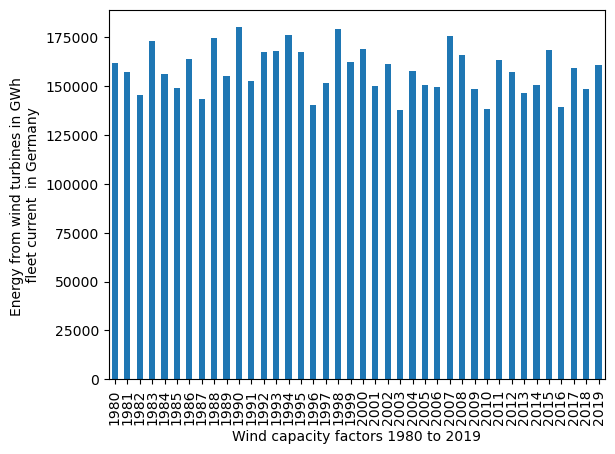

In [366]:

wind_energy_yearly.plot(kind='bar', ylabel='Energy from wind turbines in GWh \n fleet current  in Germany ', xlabel='Wind capacity factors 1980 to 2019');

The plot shows the energy from wind turbines of the current fleet of turbines in Germany given the capacity factors. It shows that there is considerable yearly fluctation in the obtainable wind energy, due to the changing weather and wind conditions.

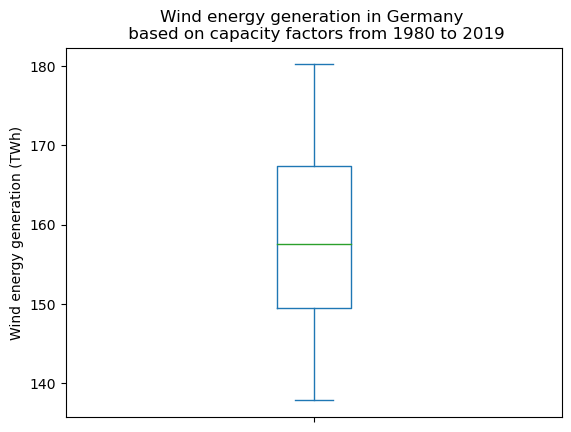

In [367]:
# Boxplot  
title= 'Wind energy generation in Germany \n based on capacity factors from 1980 to 2019'
ylabel= 'Wind energy generation (TWh)'

(wind_energy_yearly/1000).plot(kind='box', ylabel=ylabel, title=title);

In [368]:
print('Boxplot values for the wind energy generation:')
print('The estimated mean is: {} TWh'.format(
    round((wind_energy_yearly.mean()/1000),2)))
print('The median is: {} TWh'.format(
    round((wind_energy_yearly.median()/1000),2)))
print('The minimum is: {} TWh'.format(
    round((wind_energy_yearly.min()/1000),2)))
print('The maximum is: {} TWh'.format(
    round((wind_energy_yearly.mean()/1000),2)))
print('The 25th percentile is: {} TWh'.format(
    round((wind_energy_yearly.quantile(q=0.25)/1000),2)))
print('The 75th percentile is: {} TWh'.format(
    round((wind_energy_yearly.quantile(q=0.75)/1000),2)))

print('Assumptions: Projection by mean capacity factors from 1980 to 2019 given the current fleet.')

Boxplot values for the wind energy generation:
The estimated mean is: 158.16 TWh
The median is: 157.53 TWh
The minimum is: 137.84 TWh
The maximum is: 158.16 TWh
The 25th percentile is: 149.55 TWh
The 75th percentile is: 167.43 TWh
Assumptions: Projection by mean capacity factors from 1980 to 2019 given the current fleet.


The Boxplot and the Boxplot values show the considerable fluctuations in the estimated wind energy productin per year in Germany. 

#### Research question #2: Estimation for the future wind energy generation for every hour in a year 
What is the estimated wind energy generation for every hour in a year and what is the minimum and maxmimum wind energy generation?

In [369]:
df_wind_energy_mean_year = df_wind_energy.copy()

In [370]:
# Getting the time index as separate time column without the year

# Get first part of Datetime Index without year
yearly_hour = df_wind_energy.index.astype(str).str.split('-', n=1, expand=True).droplevel(0)

yearly_hour = yearly_hour.astype(str).str.split(':', n=1, expand=True).droplevel(1)

    
df_wind_energy_mean_year['yearly_hour'] = yearly_hour
df_wind_energy_mean_year['yearly_hour'] 

time
1980-01-01 00:00:00    01-01 00
1980-01-01 01:00:00    01-01 01
1980-01-01 02:00:00    01-01 02
1980-01-01 03:00:00    01-01 03
1980-01-01 04:00:00    01-01 04
                         ...   
2019-12-31 19:00:00    12-31 19
2019-12-31 20:00:00    12-31 20
2019-12-31 21:00:00    12-31 21
2019-12-31 22:00:00    12-31 22
2019-12-31 23:00:00    12-31 23
Name: yearly_hour, Length: 350640, dtype: object

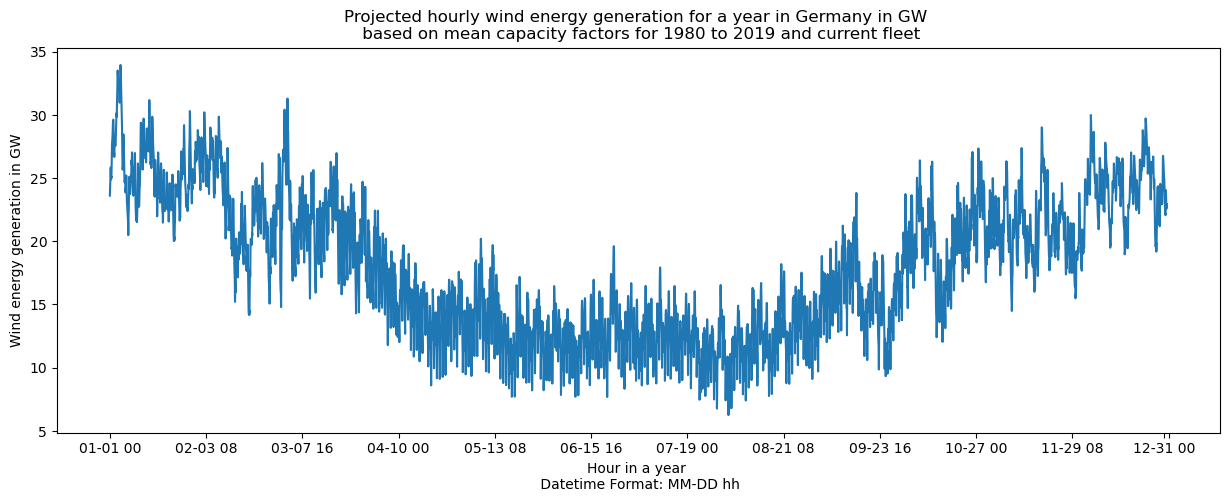

In [371]:
# Calculating the mean energy generation for every hour of a year
projected_hourly_wind_energy_per_year_Germany = df_wind_energy_mean_year.groupby(by='yearly_hour').mean(numeric_only=True).sum(axis=1)

# plot
title='Projected hourly wind energy generation for a year in Germany in GW \n based on mean capacity factors for 1980 to 2019 and current fleet'
ylabel='Wind energy generation in GW'
xlabel = 'Hour in a year \n Datetime Format: MM-DD hh'
xticks = (np.arange(0,8801, step=800)).tolist()
xticks.append(8760)

plot = projected_hourly_wind_energy_per_year_Germany.plot(figsize=(15,5), title=title, ylabel=ylabel, xlabel= xlabel, xticks= xticks)

In [372]:
min_wind = round(projected_hourly_wind_energy_per_year.min(),2)
min_wind_time = projected_hourly_wind_energy_per_year.idxmin()
print('The minimun wind energy generation is {} GW at {} (MM-DD hh)'.format(min_wind, min_wind_time))

The minimun wind energy generation is 6.26 GW at 08-02 05 (MM-DD hh)


In [373]:
max_wind = round(projected_hourly_wind_energy_per_year.max(),2)
max_wind_time = projected_hourly_wind_energy_per_year.idxmax()
print('The maximum wind energy generation is {} GW at {} (MM-DD hh)'.format(max_wind, max_wind_time))

The maximum wind energy generation is 33.94 GW at 01-04 17 (MM-DD hh)


We obtained a graph with information on the wind energy generation of every hour in a year as well as the minimun generation with 6.25 GW at 2. August 5am and maximum generation with 33.94 GW at 4. January 5pm. 


#### Research question #3: Estimation for the future wind energy generation for the German states
What is the estimated wind energy generation for the German states?  

In [374]:
wind_energy_yearly_states = df_wind_energy.groupby(by=pd.Grouper(freq='Y')).sum().mean(axis=0)
wind_energy_yearly_states_TWh = wind_energy_yearly_states / 1000
wind_energy_yearly_states_TWh.sort_values(inplace=True, ascending=False)

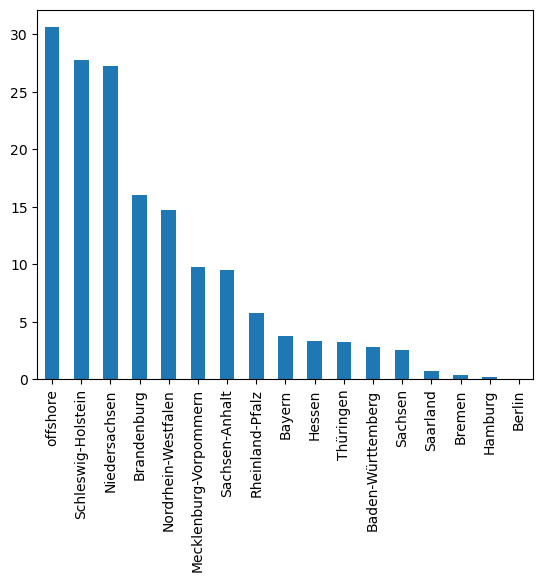

In [375]:
wind_energy_yearly_states_TWh.plot(kind='bar');

There are substantial differences between the wind energy generation of the German states. The most wind energy is produced offshore. Furthermore, the northermost states have the highest wind energy generation, due to higher installed capacities and capacity factors (due to high wind speeds). States that lie southward, away from the Baltic Sea and the North Sea with high wind speeds, have a lower generation, despite having a large total area like Bayern or Baden-Württemberg. The city states Bremen, Hamburg and Berlin have the lowest generation due to the high degree of urbanization and hence lack of suitable areas for wind turbines.   

### **5.2:** Reflection

A possible further step would be validating the results with recent data on wind energy generation in Germany. <br>
Furthermore, it might be beneficial to check for data problems concerning the location of the offshore wind turbines. As of now, all turbines in "Ausschließliche Wirtschaftszone"(Exclusive Economic Zone, 12 to 200 nautical miles) are classified as offshore turbines. Some offshore turbines might be within the 12 nautical mile distance, and are as of now classified as onhore. Moreover, the dataset on wind turbines is based on self reported feedback of the owner of the turbine. There are probably more data issues, due to user mistakes. <br>
On a different topic, it might be interesting to use different estimators for predicting the wind energy generation. As of now, the yearly mean is used. But there are probably better estimators, especially with machine learning estimators. 